In [5]:
import sqlalchemy
import pyodbc
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import requests
import io
import processing_functions
from site_information_class import SiteDataProcessor
%matplotlib inline



In [7]:
site_id = 19505
import pandas as pd

# Define the DataFrame with start and end times
time_periods = pd.DataFrame({
    'start_date': ['2024-01-02', '2024-01-10'],
    'end_date': ['2024-01-05', '2024-01-15']
})

def load_dataframes(site_id, start_date_str, end_date_str):
    df_raw_sump = None
    df_raw_flow_meter = None
    df_rainfall = None
    df_hour_agg_flow_meter = None
    df_daily_agg_sump = None

    try:
        df_raw_sump = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_raw_sump.xlsx')
        print("Loaded df_raw_sump from xlsx file.")
    except FileNotFoundError:
        print("df_raw_sump xlsx file not found.")

    try:
        df_raw_flow_meter = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_raw_flow_meter.xlsx')
        print("Loaded df_raw_flow_meter from xlsx file.")
    except FileNotFoundError:
        print("df_raw_flow_meter xlsx file not found.")

    try:
        df_rainfall = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_rainfall.xlsx')
        print("Loaded df_rainfall from xlsx file.")
    except FileNotFoundError:
        print("df_rainfall xlsx file not found.")

    try:
        df_hour_agg_flow_meter = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_hour_agg_flow_meter.xlsx')
        print("Loaded df_hour_agg_flow_meter from xlsx file.")
    except FileNotFoundError:
        print("df_hour_agg_flow_meter xlsx file not found.")

    try:
        df_daily_agg_sump = pd.read_excel(f'../data/raw/site{site_id}_from_{start_date_str}_to_{end_date_str}_daily_agg_sump.xlsx')
        print("Loaded df_daily_agg_sump from xlsx file.")
    except FileNotFoundError:
        print("df_daily_agg_sump xlsx file not found.")

    return df_raw_sump, df_raw_flow_meter, df_rainfall, df_hour_agg_flow_meter, df_daily_agg_sump

# Initialize lists to store the dataframes for each type
df_raw_sump_list = []
df_raw_flow_meter_list = []
df_rainfall_list = []
df_hour_agg_flow_meter_list = []
df_daily_agg_sump_list = []

# Loop through each time period and load the dataframes
for index, row in time_periods.iterrows():
    start_date_str = row['start_date']
    end_date_str = row['end_date']
    df_raw_sump, df_raw_flow_meter, df_rainfall, df_hour_agg_flow_meter, df_daily_agg_sump = load_dataframes(site_id, start_date_str, end_date_str)
    
    if df_raw_sump is not None:
        df_raw_sump_list.append(df_raw_sump)
    if df_raw_flow_meter is not None:
        df_raw_flow_meter_list.append(df_raw_flow_meter)
    if df_rainfall is not None:
        df_rainfall_list.append(df_rainfall)
    if df_hour_agg_flow_meter is not None:
        df_hour_agg_flow_meter_list.append(df_hour_agg_flow_meter)
    if df_daily_agg_sump is not None:
        df_daily_agg_sump_list.append(df_daily_agg_sump)

# Combine the dataframes for each type
df_raw_sump_combined = pd.concat(df_raw_sump_list, ignore_index=True)
#df_raw_flow_meter_combined = pd.concat(df_raw_flow_meter_list, ignore_index=True)
df_rainfall_combined = pd.concat(df_rainfall_list, ignore_index=True)
df_hour_agg_flow_meter_combined = pd.concat(df_hour_agg_flow_meter_list, ignore_index=True)
#df_daily_agg_sump_combined = pd.concat(df_daily_agg_sump_list, ignore_index=True)

# Now you have combined dataframes for each type of data

df_raw_sump = df_raw_sump_combined
df_rainfall = df_rainfall_combined 
df_hour_agg_flow_meter = df_hour_agg_flow_meter_combined



Loaded df_raw_sump from xlsx file.
df_raw_flow_meter xlsx file not found.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.
Loaded df_raw_sump from xlsx file.
df_raw_flow_meter xlsx file not found.
Loaded df_rainfall from xlsx file.
Loaded df_hour_agg_flow_meter from xlsx file.
df_daily_agg_sump xlsx file not found.


In [19]:
# Print the head(5) of each dataframe and save to xlsx
if df_raw_sump is not None:
    print("Head of df_raw_sump:")
    print(df_raw_sump.head(5))



Head of df_raw_sump:
              TimeGMT       date  SourceSystemId  DbAddr        DbName  \
0 2024-01-02 00:00:00 2024-01-02               1   11943  Default Name   
1 2024-01-02 00:05:00 2024-01-02               1   11943  Default Name   
2 2024-01-02 00:10:00 2024-01-02               1   11943  Default Name   
3 2024-01-02 00:15:00 2024-01-02               1   11943  Default Name   
4 2024-01-02 00:20:00 2024-01-02               1   11943  Default Name   

       EValue  Year  Month  Day  
0  100.387207  2024      1    2  
1    7.066895  2024      1    2  
2   51.544922  2024      1    2  
3  100.951172  2024      1    2  
4   99.569824  2024      1    2  


In [11]:
if df_hour_agg_flow_meter is not None:
    print("Head of df_hour_agg_flow_meter:")
    print(df_hour_agg_flow_meter.head(5))

Head of df_hour_agg_flow_meter:
   Hour  DbAddr  count  meanEValue  stddev_EValue  Year  Month  Day
0     0   11726     60       40.10       2.771708  2024      1    2
1     1   11726     60       40.88       2.389054  2024      1    2
2     2   11726     60       40.76       2.216597  2024      1    2
3     3   11726     60       40.14       2.869542  2024      1    2
4     4   11726     60       40.39       2.510833  2024      1    2


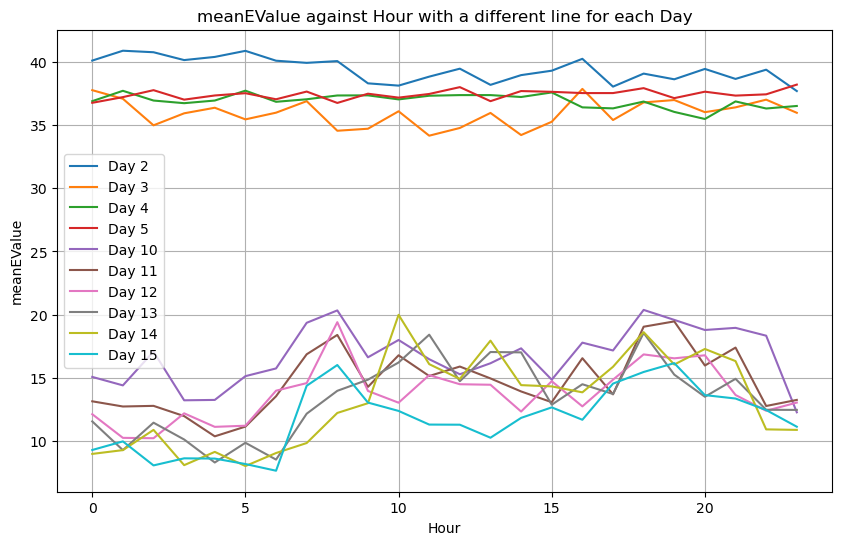

In [13]:
def plot_meanEValue(df):
    """
    Plots 'meanEValue' against 'Hour' with a different line for each 'Day' in the given dataframe.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data with columns 'Hour', 'DbAddr', 'count', 'meanEValue', 
                       'stddev_EValue', 'Year', 'Month', 'Day'
    """
    plt.figure(figsize=(10,6))
    for day in df['Day'].unique():
        day_data = df[df['Day'] == day]
        plt.plot(day_data['Hour'], day_data['meanEValue'], label=f'Day {day}')

    plt.xlabel('Hour')
    plt.ylabel('meanEValue')
    plt.title('meanEValue against Hour with a different line for each Day')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_meanEValue(df_hour_agg_flow_meter)

In [15]:
if df_raw_flow_meter is not None:
    print("Head of df_raw_flow_meter:")
    print(df_raw_flow_meter.head(5))


In [17]:

if df_rainfall is not None:
    print("Head of df_rainfall:")
    print(df_rainfall.head(5))
df_rainfall['timestamp'] = pd.to_datetime(df_rainfall['ReadingDate'], format='%Y%m%d%H%M')
print(df_rainfall.head(5))

Head of df_rainfall:
    ReadingDate  Easting  Northing  Intensity(mm/hr)  Depth(mm)  Year  Month  \
0  202401020930   337500    161500              0.30       3.56  2024      1   
1  202401020925   337500    161500              0.26       3.06  2024      1   
2  202401020920   337500    161500              0.19       2.28  2024      1   
3  202401020915   337500    161500              0.22       2.63  2024      1   
4  202401020910   337500    161500              0.05       0.63  2024      1   

   Day  
0    2  
1    2  
2    2  
3    2  
4    2  
    ReadingDate  Easting  Northing  Intensity(mm/hr)  Depth(mm)  Year  Month  \
0  202401020930   337500    161500              0.30       3.56  2024      1   
1  202401020925   337500    161500              0.26       3.06  2024      1   
2  202401020920   337500    161500              0.19       2.28  2024      1   
3  202401020915   337500    161500              0.22       2.63  2024      1   
4  202401020910   337500    161500          

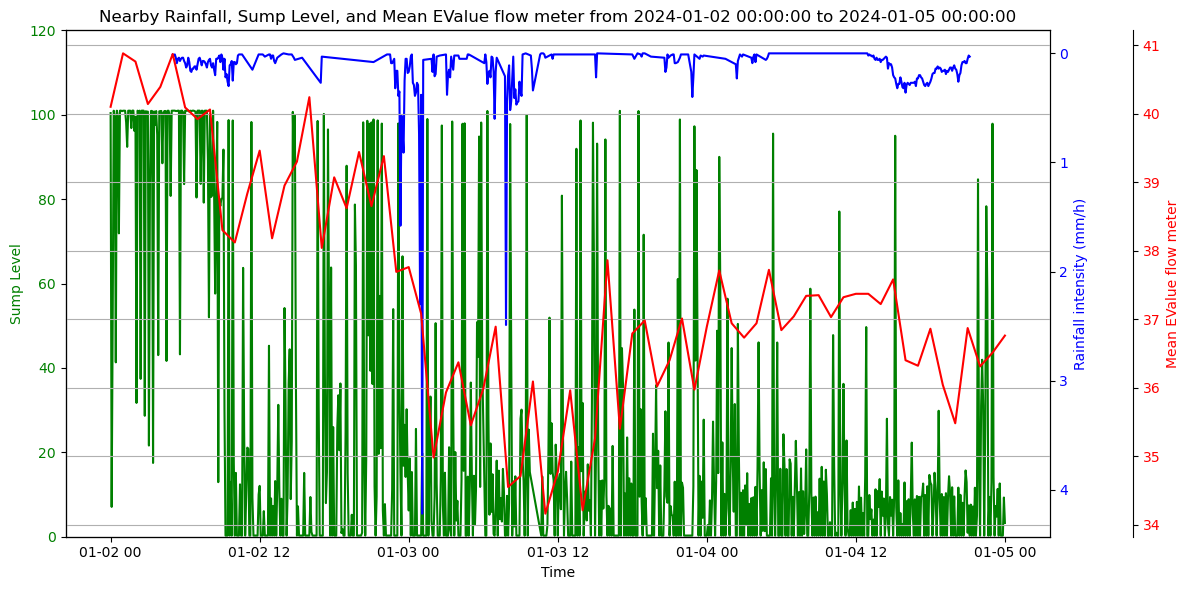

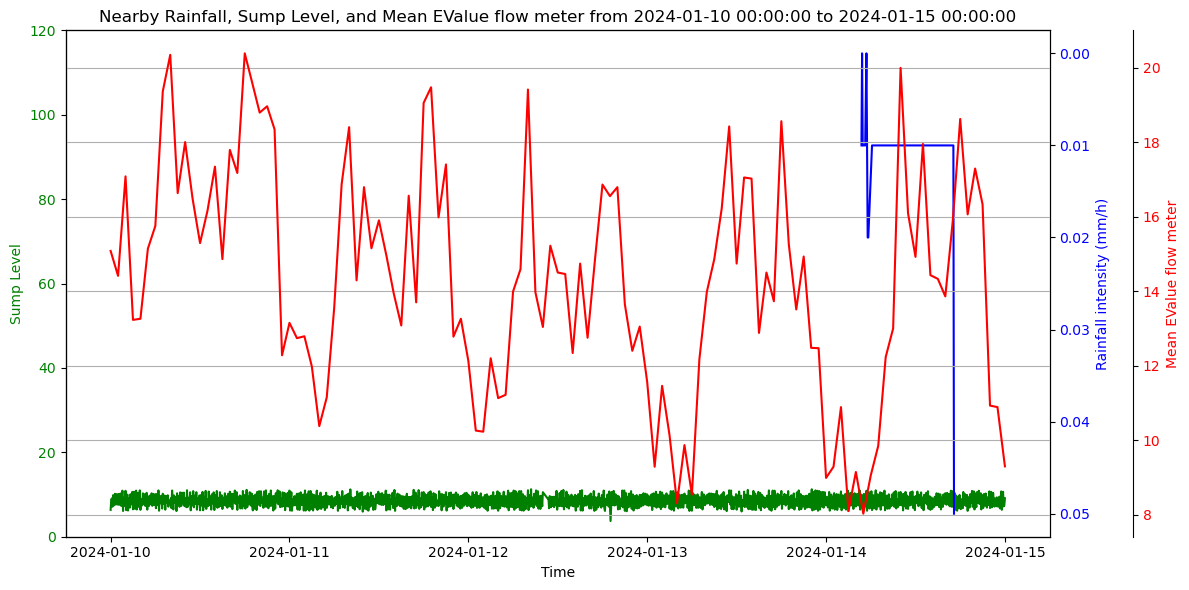

In [29]:
from IPython.display import display, clear_output
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import processing_functions


df_sump_filtered = df_raw_sump
df_rainfall_filtered = df_rainfall
df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter

def plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_time, end_time, df_raw_sump, df_rainfall, df_hour_agg_flow_meter, sump_ylim=None):
    # Convert start and end times to datetime
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)

    # Filter the dataframes based on the specified time interval
    df_sump_filtered = df_raw_sump[(df_raw_sump["TimeGMT"] >= start_time) & (df_raw_sump["TimeGMT"] <= end_time)]
    df_rainfall_filtered = df_rainfall[(df_rainfall["timestamp"] >= start_time) & (df_rainfall["timestamp"] <= end_time)]
    df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter[
        (pd.to_datetime(df_hour_agg_flow_meter["Year"].astype(str) + '-' + df_hour_agg_flow_meter["Month"].astype(str) + '-' + df_hour_agg_flow_meter["Day"].astype(str) + ' ' + df_hour_agg_flow_meter["Hour"].astype(str) + ':00:00') >= start_time) & 
        (pd.to_datetime(df_hour_agg_flow_meter["Year"].astype(str) + '-' + df_hour_agg_flow_meter["Month"].astype(str) + '-' + df_hour_agg_flow_meter["Day"].astype(str) + ' ' + df_hour_agg_flow_meter["Hour"].astype(str) + ':00:00') <= end_time)
    ]

    # Sort the filtered dataframes by their respective time columns
    df_sump_filtered = df_sump_filtered.sort_values(by="TimeGMT")
    df_rainfall_filtered = df_rainfall_filtered.sort_values(by="timestamp")
    df_hour_agg_flow_meter_filtered = df_hour_agg_flow_meter_filtered.sort_values(by=["Year", "Month", "Day", "Hour"])

    # Create a figure and axis objects
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot sump level on the first y-axis
    ax1.plot(df_sump_filtered["TimeGMT"], df_sump_filtered["EValue"], color='green', label='Sump Level')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Sump Level', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Apply user-defined axis range if provided
    if sump_ylim:
        ax1.set_ylim(sump_ylim)

    # Create a second y-axis for rainfall
    ax2 = ax1.twinx()
    ax2.plot(df_rainfall_filtered["timestamp"], df_rainfall_filtered["Intensity(mm/hr)"], color='blue', label='Rainfall')
    ax2.set_ylabel('Rainfall intensity (mm/h)', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.invert_yaxis()  # Reverse the y-axis for rainfall

    # Create a third y-axis for meanEValue
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to the right
    ax3.plot(
        pd.to_datetime(df_hour_agg_flow_meter_filtered["Year"].astype(str) + '-' + df_hour_agg_flow_meter_filtered["Month"].astype(str) + '-' + df_hour_agg_flow_meter_filtered["Day"].astype(str) + ' ' + df_hour_agg_flow_meter_filtered["Hour"].astype(str) + ':00:00'), 
        df_hour_agg_flow_meter_filtered["meanEValue"], color='red', label='Mean EValue'
    )
    ax3.set_ylabel('Mean EValue flow meter', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Add title and grid
    plt.title(f'Nearby Rainfall, Sump Level, and Mean EValue flow meter from {start_time} to {end_time}')
    fig.tight_layout()
    plt.grid(True)

    # Show the plot
    plt.show()


spill_level = 90
sump_ylim = (0, 120)
# Example usage
#processing_functions.plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_time_plot, end_time_plot, df_sump_filtered, df_rainfall_filtered, df_hour_agg_flow_meter_filtered)
for index, row in time_periods.iterrows():
    start_date_plot = row['start_date']
    end_date_plot = row['end_date']
    plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_date_plot, end_date_plot, df_sump_filtered , df_rainfall, df_hour_agg_flow_meter, sump_ylim=sump_ylim)



In [93]:
spill_level = 90

In [23]:
# Define spill_threshold and on_level_threshold

for index, row in time_periods.iterrows():
    start_date_plot = row['start_date']
    end_date_plot = row['end_date']
    procesing_functions.plot_rainfall_mean_agg_flow_meter_and_raw_sump_level(start_date_plot, end_date_plot, df_sump_filtered , df_rainfall, df_hour_agg_flow_meter, spill_level=spill_level)

NameError: name 'plot_rainfall_mean_agg_flow_meter_and_raw_sump_level' is not defined

In [51]:
import pandas as pd

# Define your thresholds
your_spill_threshold = 70  # Example value, replace with actual spill level
your_on_level_threshold = 20
your_on_level_upper_limit = 25
your_sump_level_lower_limit = your_spill_threshold * 0.9

# Define your date range
start_date_str = '2023-01-01'
end_date_str = '2023-01-05'

# Convert date strings to datetime objects
start_date = pd.to_datetime(start_date_str)
end_date = pd.to_datetime(end_date_str)

def identify_falling_periods(df, spill_threshold, on_level_threshold, on_level_upper_limit, sump_level_lower_limit):
    """Identifies falling periods in a DataFrame based on specified conditions.

    Args:
        df (pd.DataFrame): Input DataFrame.
        spill_threshold (float): Threshold for spill level.
        on_level_threshold (float): Threshold for on-level level.
        on_level_upper_limit (float): Upper limit for on-level level.
        sump_level_lower_limit (float): Lower limit for sump level.

    Returns:
        pd.DataFrame: DataFrame containing the identified falling periods.
    """

    # Check if required columns exist
    required_columns = ['TimeGMT', 'EValue']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Missing required columns: {required_columns}")

    # Filter the DataFrame by the date range
    df = df[(df['TimeGMT'] >= start_date) & (df['TimeGMT'] <= end_date)]

    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df[['TimeGMT', 'EValue']].copy()

    # Add a new boolean column 'Falling'
    df_copy['Falling'] = df_copy['EValue'].le(df_copy['EValue'].shift())

    # Subset to a new dataframe all periods where there is a constant fall
    falling_periods = []
    current_period = []

    for index, row in df_copy.iterrows():
        if row['Falling'] and spill_threshold >= row['EValue'] >= on_level_threshold:
            current_period.append(row)
        else:
            if current_period:  # End of falling period
                falling_periods.append(current_period)
                current_period = []

    # Add the last period if it was falling
    if current_period:
        falling_periods.append(current_period)

    # Convert list of periods into separate dataframes
    falling_dfs = [pd.DataFrame(period) for period in falling_periods if period]

    print("Falling DataFrames:")
    for df in falling_dfs:
        print(df)

    filtered_falling_dfs = []
    for df in falling_dfs:
        try:
            if df['EValue'].all() >= sump_level_lower_limit and df['EValue'].iloc[-1] <= on_level_upper_limit:
                filtered_falling_dfs.append(df)
        except (KeyError, TypeError):
            print("Error processing DataFrame:", df)

    print("Filtered Falling DataFrames:")
    for df in filtered_falling_dfs:
        print(df)

    for i, df in enumerate(filtered_falling_dfs):
        df['falling_period_id'] = i

    # Combine all individual dataframes back into one dataframe if needed
    if filtered_falling_dfs:
        final_df_falling_periods = pd.concat(filtered_falling_dfs).reset_index(drop=True)
    else:
        final_df_falling_periods = pd.DataFrame()  # Return an empty DataFrame if no periods found

    return final_df_falling_periods

# Example usage
# Replace with your actual data
df_sump_filtered = pd.DataFrame({
    'TimeGMT': pd.date_range(start='2023-01-01', periods=100, freq='H'),
    'EValue': pd.Series(range(100)).apply(lambda x: 50 - x if x < 50 else x - 50)
})

result_is_falling = identify_falling_periods(df_sump_filtered, 
                                 spill_threshold=your_spill_threshold,
                                 on_level_threshold=your_on_level_threshold,
                                 on_level_upper_limit=your_on_level_upper_limit,
                                 sump_level_lower_limit=your_sump_level_lower_limit)
print("Resulting Falling Periods DataFrame:")
print(result_is_falling)

# Save the result to a xlsx file in .../data/processed
output_path = '../data/processed/result_is_falling.xlsx'
result_is_falling.to_excel(output_path, index=False)

print(f"DataFrame saved to {output_path}")


Falling DataFrames:
               TimeGMT  EValue  Falling
1  2023-01-01 01:00:00      49     True
2  2023-01-01 02:00:00      48     True
3  2023-01-01 03:00:00      47     True
4  2023-01-01 04:00:00      46     True
5  2023-01-01 05:00:00      45     True
6  2023-01-01 06:00:00      44     True
7  2023-01-01 07:00:00      43     True
8  2023-01-01 08:00:00      42     True
9  2023-01-01 09:00:00      41     True
10 2023-01-01 10:00:00      40     True
11 2023-01-01 11:00:00      39     True
12 2023-01-01 12:00:00      38     True
13 2023-01-01 13:00:00      37     True
14 2023-01-01 14:00:00      36     True
15 2023-01-01 15:00:00      35     True
16 2023-01-01 16:00:00      34     True
17 2023-01-01 17:00:00      33     True
18 2023-01-01 18:00:00      32     True
19 2023-01-01 19:00:00      31     True
20 2023-01-01 20:00:00      30     True
21 2023-01-01 21:00:00      29     True
22 2023-01-01 22:00:00      28     True
23 2023-01-01 23:00:00      27     True
24 2023-01-02 00:00:

C:\Users\RMCGINT\AppData\Local\Temp\ipykernel_22892\3407057688.py:94: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'TimeGMT': pd.date_range(start='2023-01-01', periods=100, freq='H'),


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final_df_falling_periods is your dataframe from the previous steps
# Reset the TimeGMT to 0 for each falling_period_id
final_df_falling_periods['TimeGMT_reset'] = final_df_falling_periods.groupby('falling_period_id')['TimeGMT'].transform(lambda x: x - x.min())
final_df_falling_periods['TimeGMT_reset_seconds'] = final_df_falling_periods['TimeGMT_reset'].dt.total_seconds()

# Plotting
plt.figure(figsize=(10, 6))

for period_id, group in final_df_falling_periods.groupby('falling_period_id'):
    plt.plot(group['TimeGMT_reset_seconds'], group['EValue'], label=f'Period {period_id}')

plt.xlabel('TimeGMT_reset_seconds')
plt.ylabel('EValue')
plt.title('Falling Periods Overlay - Spill level to ON level')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming final_df_falling_periods and flow_meter_file are already loaded as DataFrames

# Ensure the 'time' columns are in datetime format
print( df_flow_meter.iloc[:, 1])


